In [1]:
import os
os.chdir('D://scratch_backup//alpine//beri9208//mnc-pt-pyrid//calcs//surfs//4n//No_bias//')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
surf_name = '4N, No_bias'
save_name = '4n_nb'
save_dir = 'C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//charge_analysis//'

In [2]:
import funcs
R, S, mu = funcs.get_output_shape('out')
d_tot = np.fromfile('d_tot')
d_tot = np.reshape(d_tot, S)
a_tuple, da_tuple = funcs.init_box_xyz_coords(R, S)
plot_slice = np.zeros(np.shape(d_tot[:,:,0]))
intg_z_bounds = (int(S[2]/2), int(S[2]/2) + int(S[2]/8))
for i in range(intg_z_bounds[0], intg_z_bounds[1]):
    plot_slice += d_tot[:,:,i]
plot_slice *= da_tuple[2]

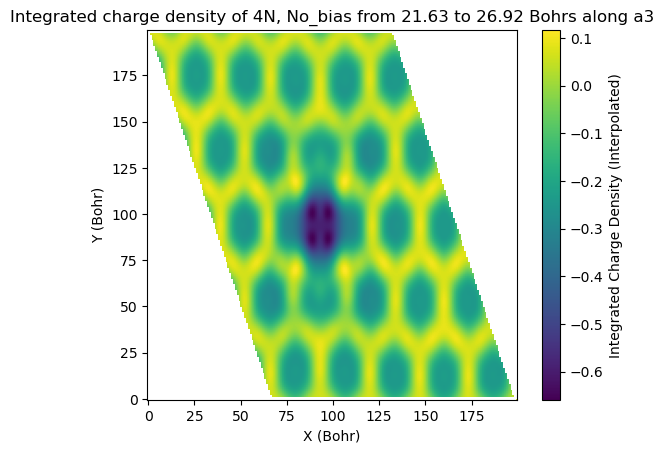

In [5]:
# Generate sample data (replace this with your 2D array and associated x/y values)
num_points = 100
x, y, z = funcs.conv_to_cartesian(plot_slice, R, S)

# Create a regular x/y grid
grid_x, grid_y = np.mgrid[min(x):max(x):200j, min(y):max(y):200j]

# Interpolate data onto the regular grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# # Plot the original data as scatter points
# plt.scatter(x, y, c=z, marker='o', cmap='viridis', edgecolors='k')
# plt.colorbar(label='Integrated Charge Density')

# Plot the interpolated data as a 2D heatmap
plt.figure()
plt.imshow(grid_z.T, origin='lower', cmap='viridis')
#plt.imshow(grid_z.T, origin='lower', cmap='viridis', extent=[0, 1, 0, 1])
plt.colorbar(label='Integrated Charge Density (Interpolated)')

# Set axis labels and title
plt.xlabel('X (Bohr)')
plt.ylabel('Y (Bohr)')
lb = intg_z_bounds[0]*da_tuple[2]
ub = intg_z_bounds[1]*da_tuple[2]
lb = format(lb, f".{2}f")
ub = format(ub, f".{2}f")
plt.title('Integrated charge density of ' + surf_name + ' from ' + lb + ' to ' + ub +  ' Bohrs along a3')
plt.savefig(save_dir + save_name + '.png')

# Display the plots
plt.show()

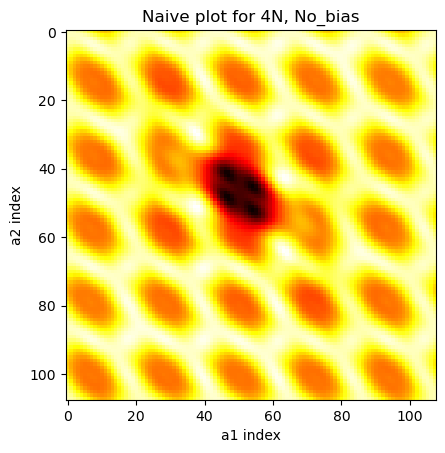

In [4]:
plt.imshow(plot_slice, cmap='hot', interpolation='nearest')
plt.xlabel('a1 index')
plt.ylabel('a2 index')
plt.title('Naive plot for ' + surf_name)
plt.savefig(save_dir + save_name + '_direct.png')
plt.show()

In [114]:
x

[0.0,
 -1273.3632,
 -2546.7264,
 -3820.0896000000002,
 -5093.4528,
 -6366.816,
 -7640.1792000000005,
 -8913.5424,
 -10186.9056,
 -11460.2688,
 -12733.632,
 -14006.9952,
 -15280.358400000001,
 -16553.7216,
 -17827.0848,
 -19100.448,
 -20373.8112,
 -21647.1744,
 -22920.5376,
 -24193.9008,
 -25467.264,
 -26740.6272,
 -28013.9904,
 -29287.3536,
 -30560.716800000002,
 -31834.079999999998,
 -33107.4432,
 -34380.8064,
 -35654.1696,
 -36927.5328,
 -38200.896,
 -39474.2592,
 -40747.6224,
 -42020.9856,
 -43294.3488,
 -44567.712,
 -45841.0752,
 -47114.4384,
 -48387.8016,
 -49661.1648,
 -50934.528,
 -52207.891200000005,
 -53481.2544,
 -54754.6176,
 -56027.9808,
 -57301.344,
 -58574.7072,
 -59848.070400000004,
 -61121.433600000004,
 -62394.796800000004,
 -63668.159999999996,
 -64941.523199999996,
 -66214.8864,
 -67488.24960000001,
 -68761.6128,
 -70034.976,
 -71308.3392,
 -72581.70240000001,
 -73855.0656,
 -75128.4288,
 -76401.792,
 -77675.1552,
 -78948.5184,
 -80221.88160000001,
 -81495.2448,
 -82